In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

with open("../results/tone_1.kHz.pic", "rb") as f:
    result = pickle.load(f)

arr_n_spikes_r_lso = [x[0] for angle, x in result.items()]
arr_n_spikes_l_lso = [x[1] for angle, x in result.items()]
arr_n_spikes_r_mso = [x[2] for angle, x in result.items()]
arr_n_spikes_l_mso = [x[3] for angle, x in result.items()]
angles = [int(i) for i in result.keys()]

In [8]:
interp_r_lso = scp.interpolate.PchipInterpolator(angles, arr_n_spikes_r_lso)
interp_l_lso = scp.interpolate.PchipInterpolator(angles, arr_n_spikes_l_lso)
interp_r_mso = scp.interpolate.PchipInterpolator(angles, arr_n_spikes_r_mso)
interp_l_mso = scp.interpolate.PchipInterpolator(angles, arr_n_spikes_l_mso)

In [10]:
angles

[90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270]

Text(0, 0.5, 'total spikes')

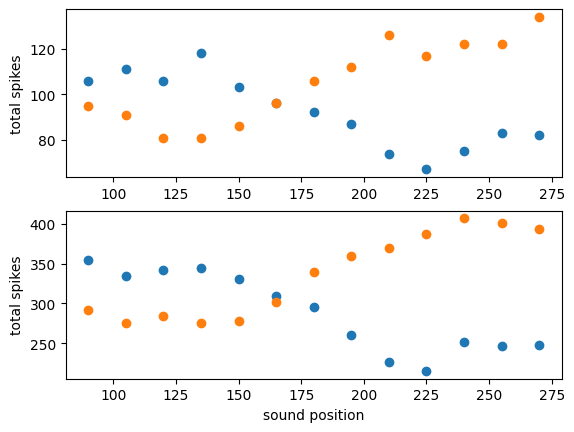

In [15]:
fig, [lso, mso] = plt.subplots(2, 1)

lso.scatter(angles, arr_n_spikes_r_lso)
# lso.plot(np.arange(200), interp_r_lso(np.arange(200)), 'c')
lso.scatter(angles, arr_n_spikes_l_lso)
# lso.plot(np.arange(200), interp_l_lso(np.arange(200)), 'orange')
lso.set_ylabel("total spikes")


mso.scatter(angles, arr_n_spikes_r_mso)
# mso.plot(np.arange(200), interp_r_mso(np.arange(200)), 'c')
mso.scatter(angles, arr_n_spikes_l_mso)
# mso.plot(np.arange(200), interp_l_mso(np.arange(200)), 'orange')
mso.set_xlabel("sound position")
mso.set_ylabel("total spikes")
